### Outline

#### how to find features?
- Use optimize function to see the results of different combinations between different features then choose the top 10 which give ues the best result.
- The input feature we choose is :\
        - SMA\
        - EMA\
        - RSI\
        - MACD\
        - Bollinger Band\
        - Standard Deviation\
        - Rate of Change\
        - ....

#### how to find out target?
- Our target is to find the peak points on which we will execute our strategy to buy and other points are to hold. Using peak function to find the points.


#### how to do model selection?
- We use 11 algorithms to build our model and do comparasion between these models and choose top 3. And we use in-sample and out-of-sample tests to evaluate our models, which contain `errors in training and test set`,  `MSE`,  `RMSE`,  `R_square` and  `AUC` to evaluate the performances of different model. 
- Then the best three results are:\
        - Logistic Regression\
        - Lasso\
        - K-Nearest Neighbors



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

(235, 16)


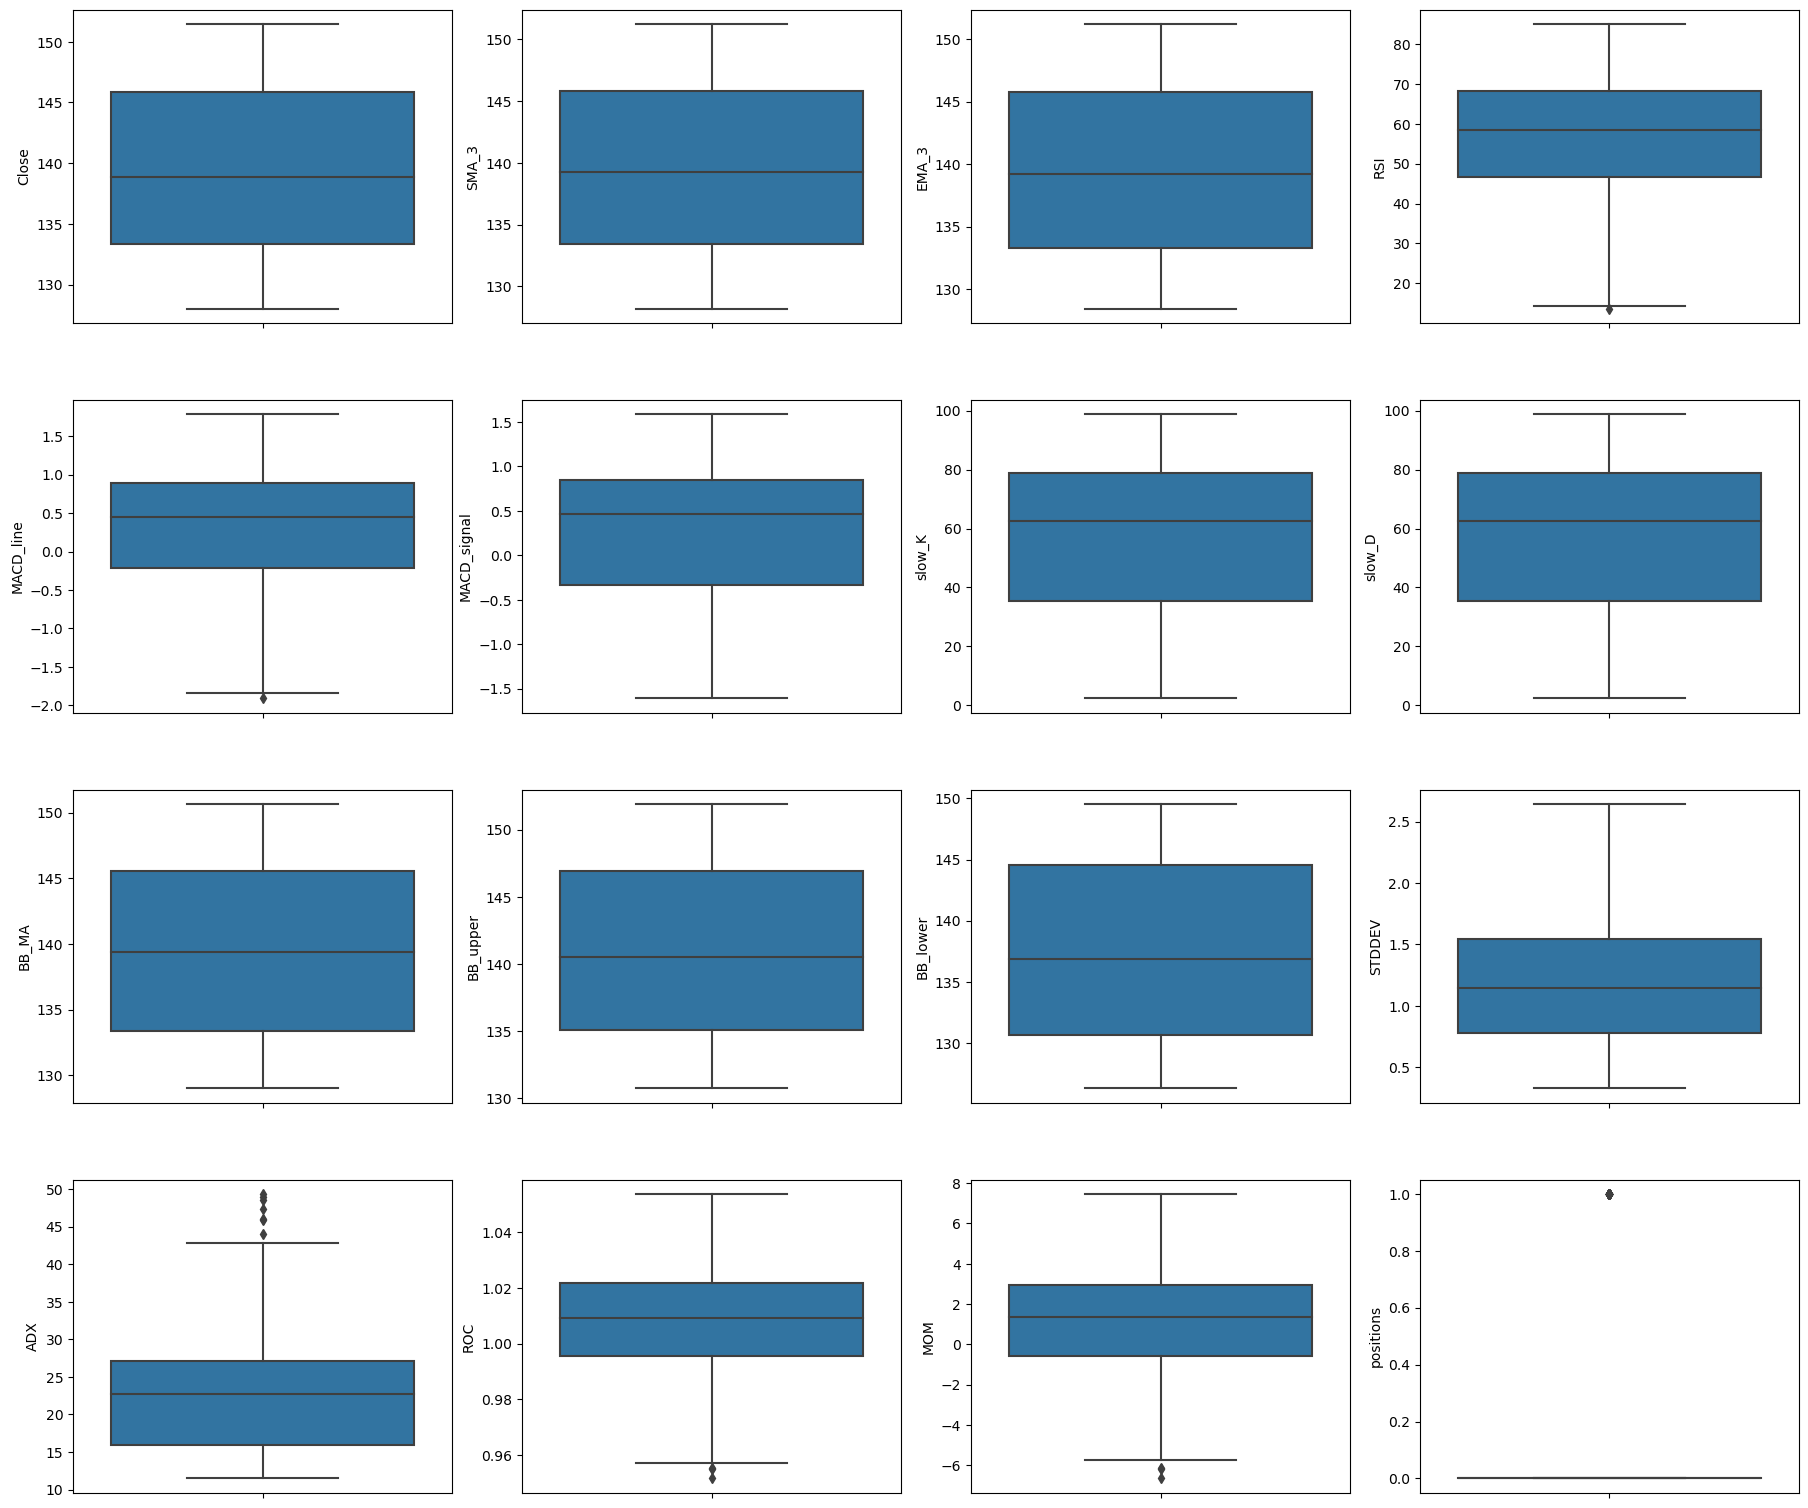

In [9]:
Features = pd.read_csv("Features.csv",index_col = [0])
print(Features.shape)
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(18, 15))
index = 0
axs = axs.flatten()
for k,v in Features.items():               
    sns.boxplot(y=k, data=Features, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

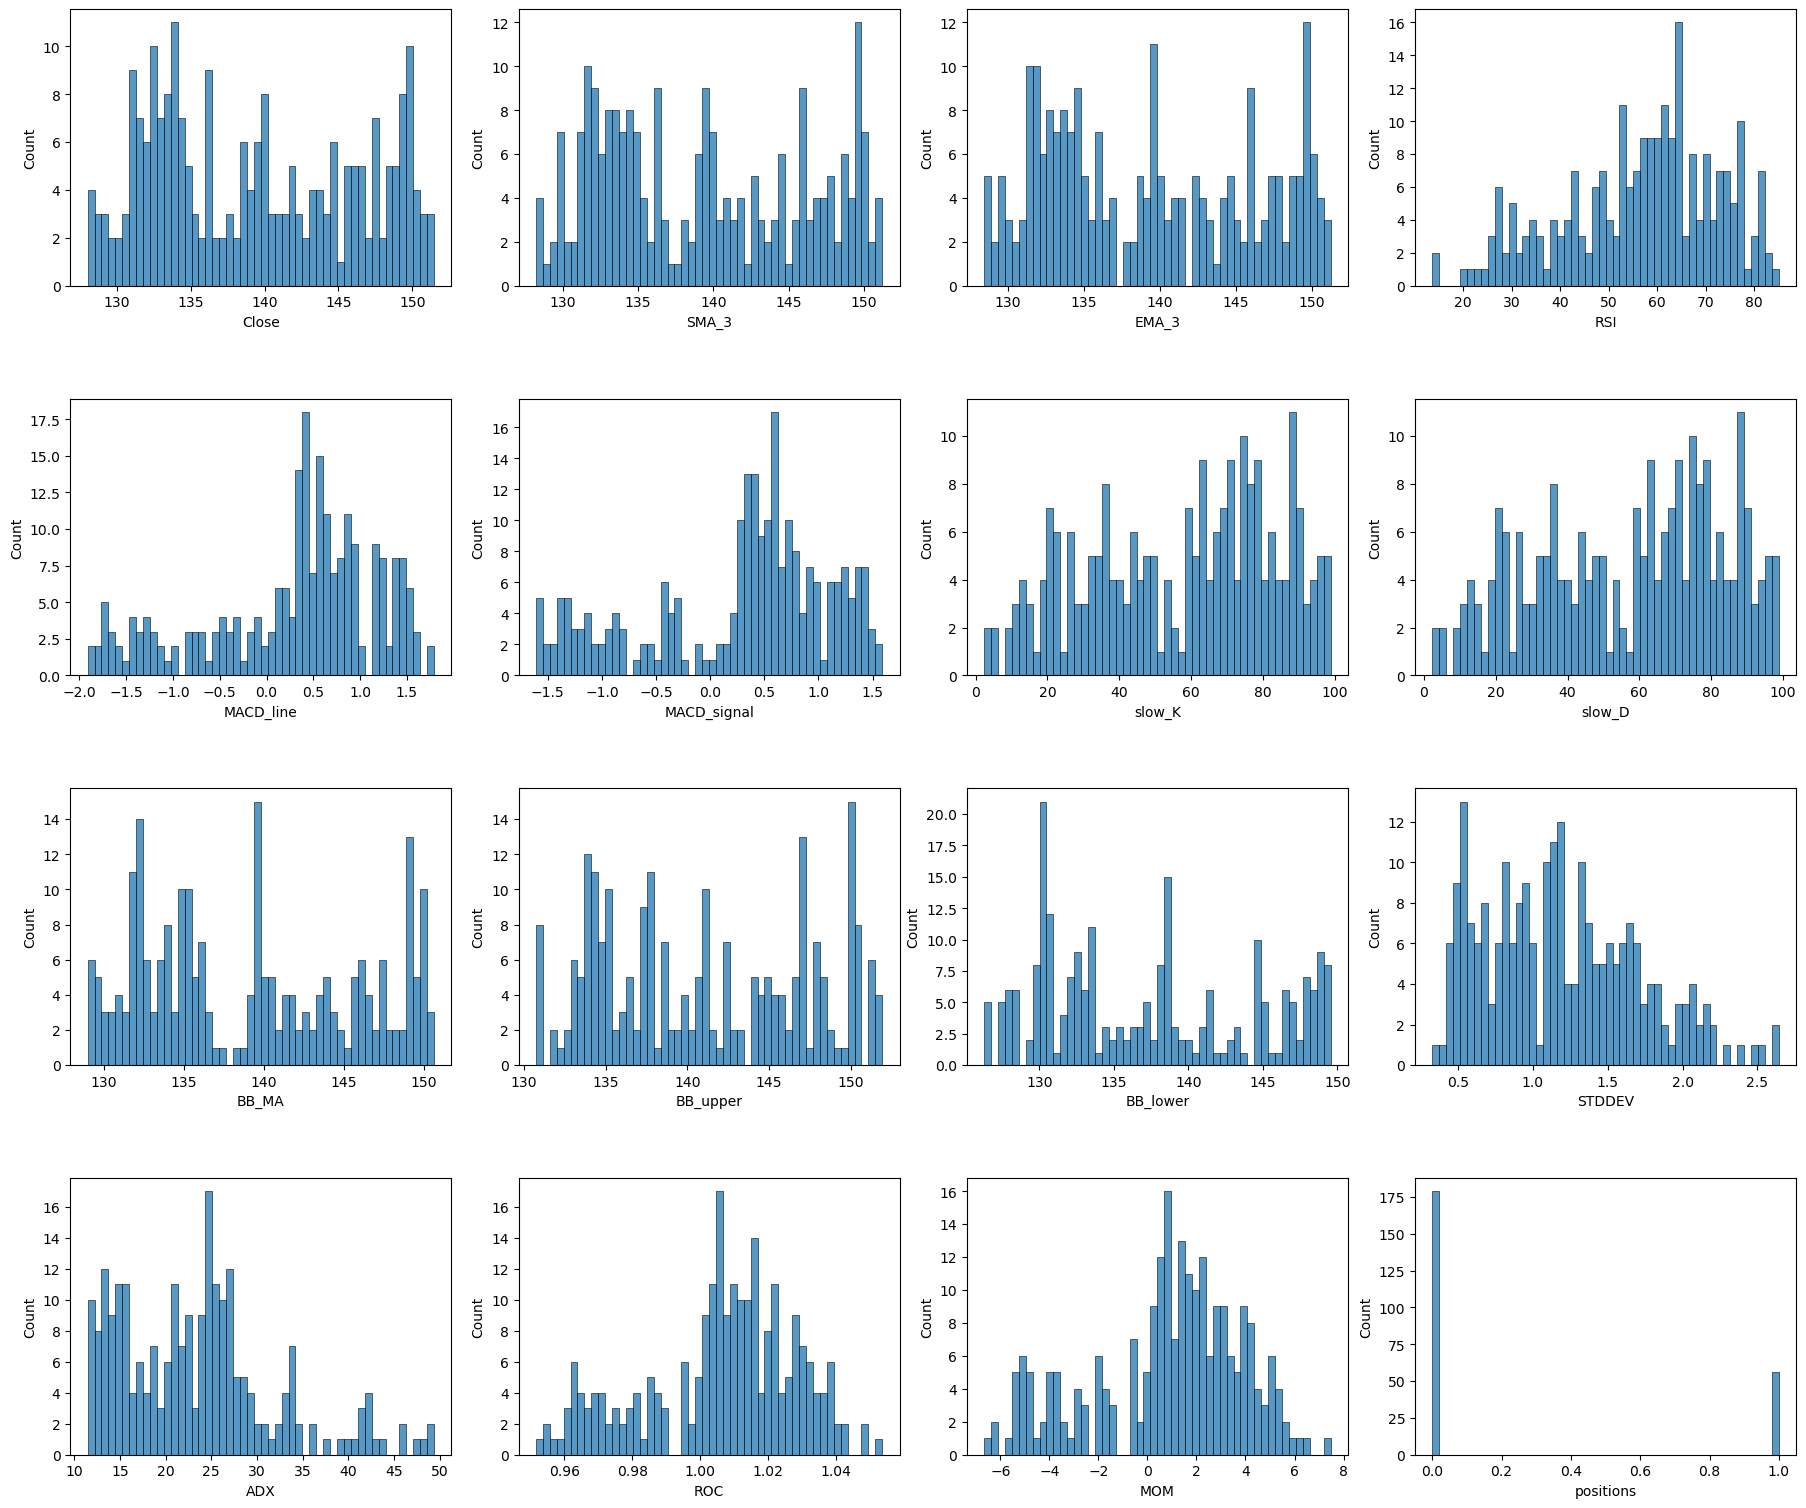

In [10]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(18, 15))
index = 0
axs = axs.flatten()
for k,v in Features.items():
   sns.histplot(v, ax=axs[index],bins = 50)
   index += 1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [27]:
# plt.figure(figsize=(20, 10))
# sns.heatmap(Features.corr().abs(),  annot=True)

/Users/wennew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


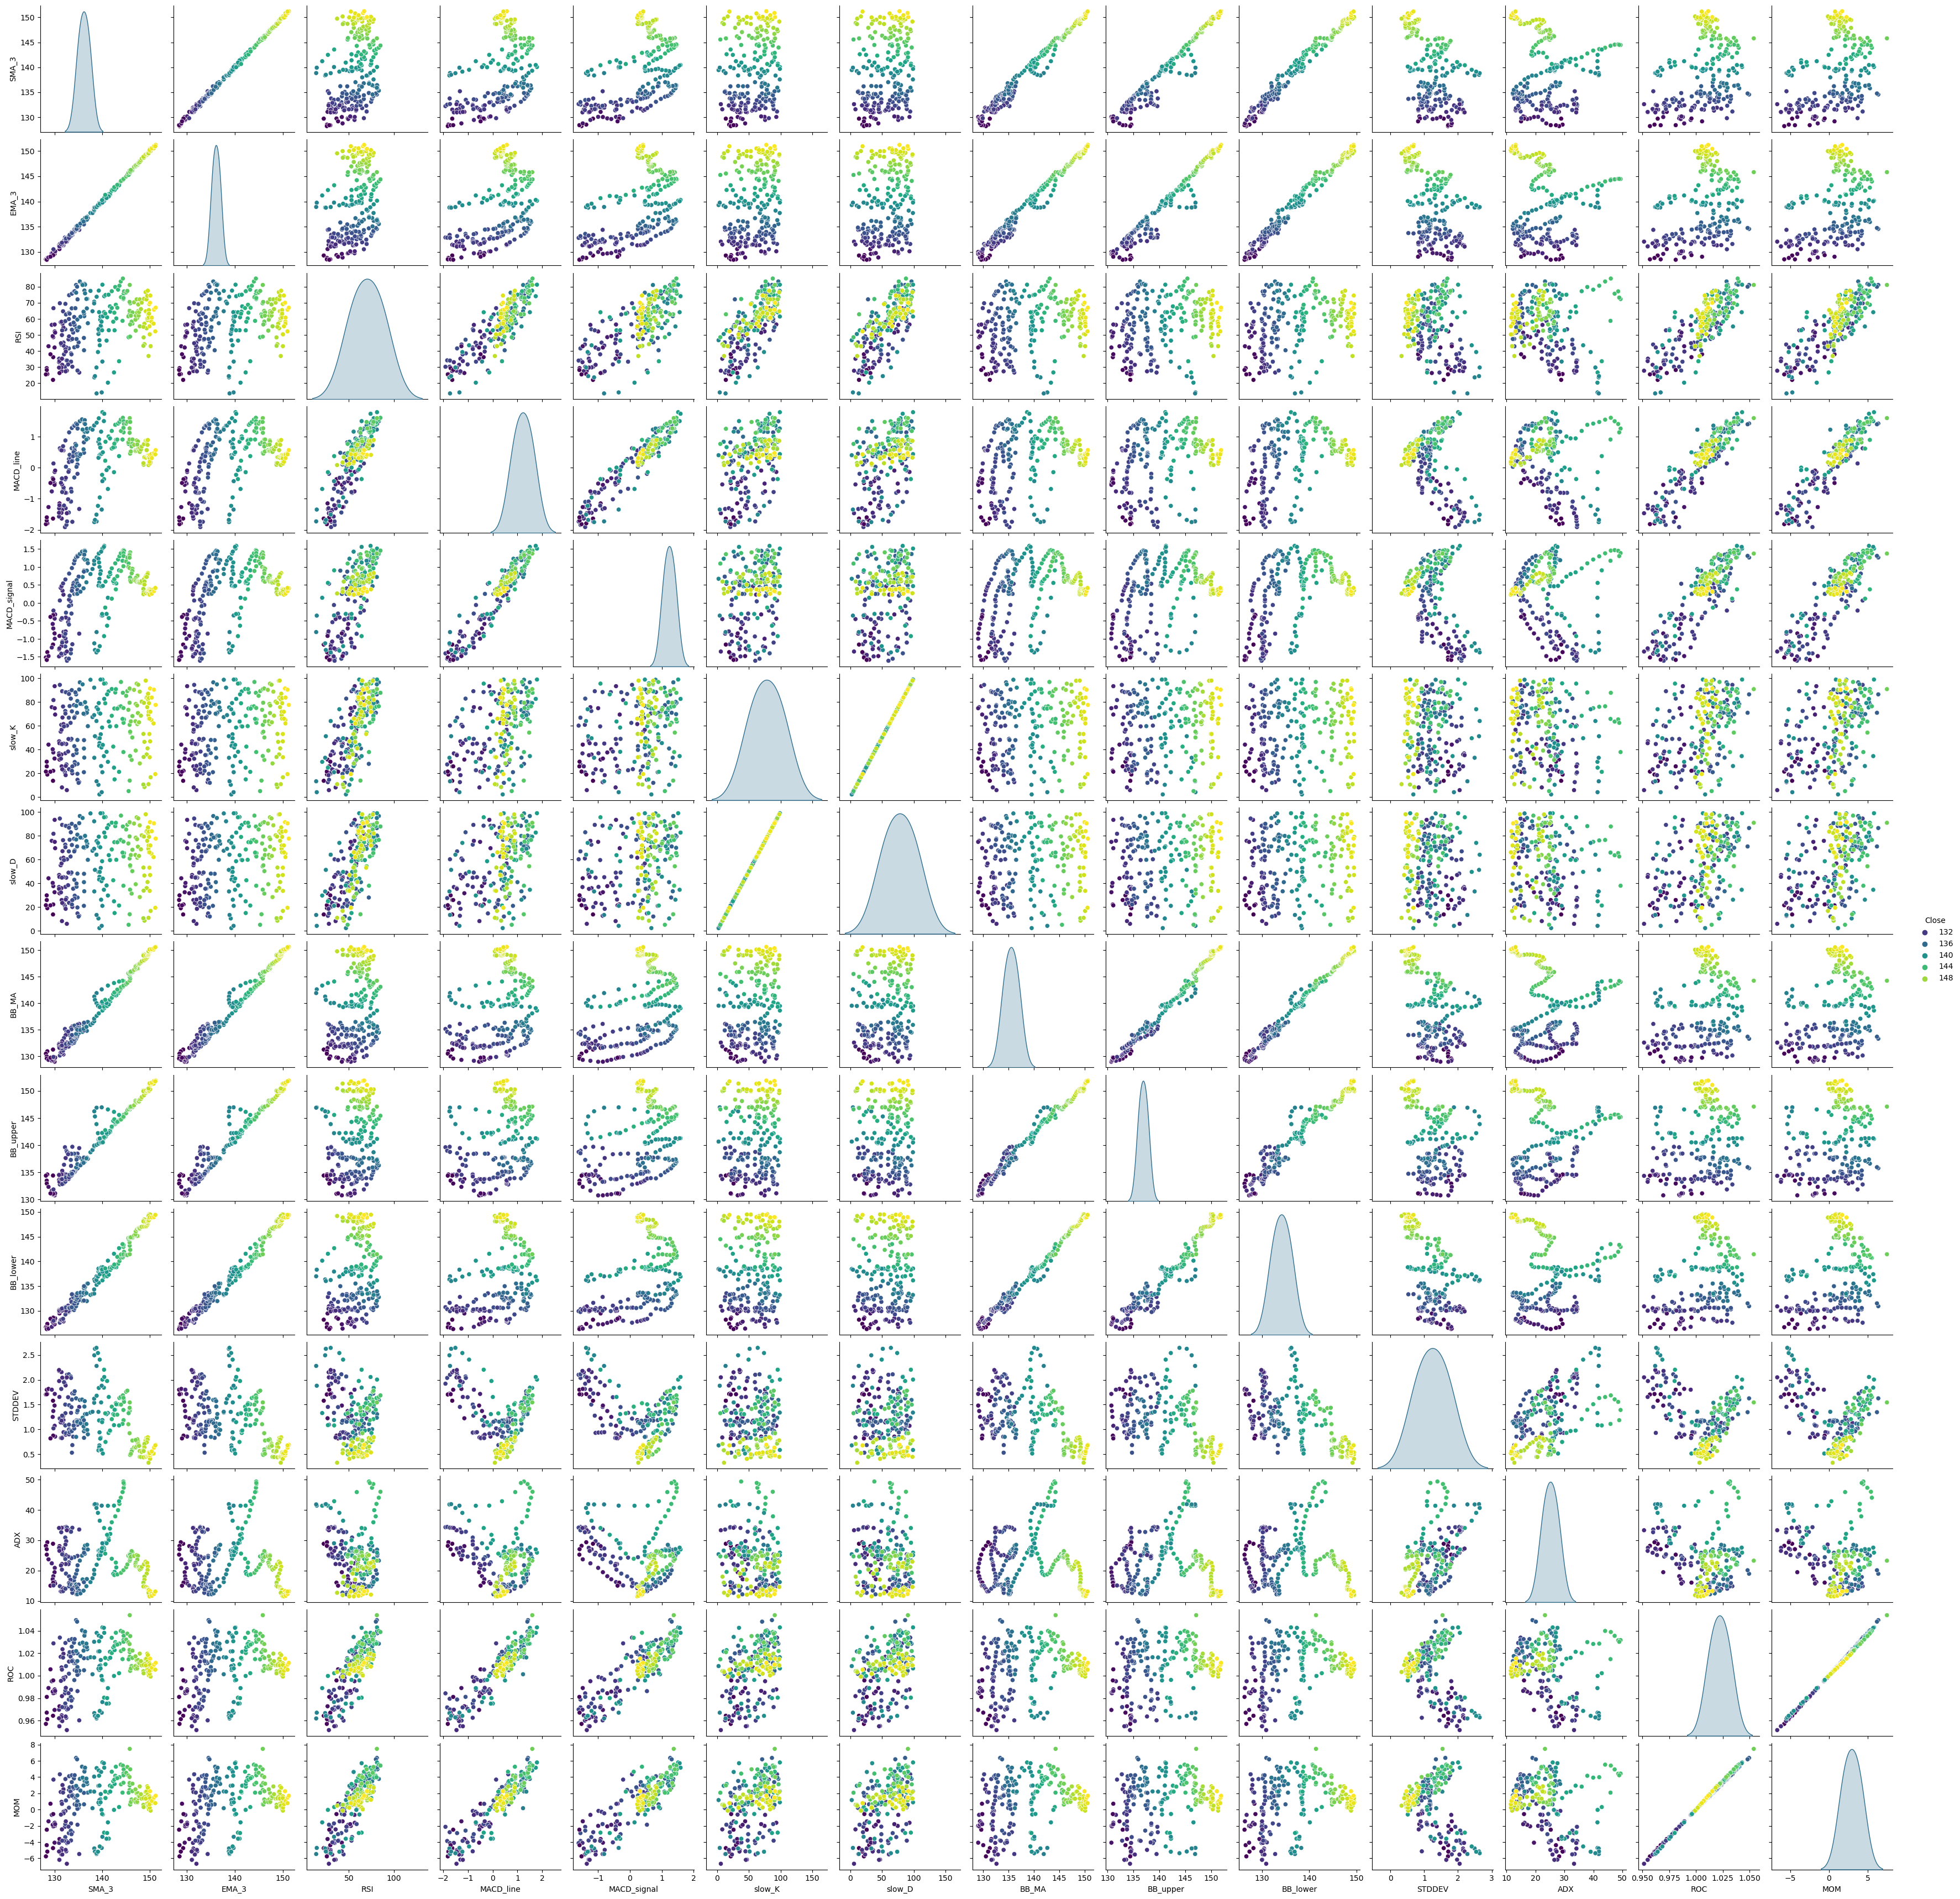

In [11]:
sns.pairplot(data=Features.drop(columns = "positions"), 
             hue="Close", palette="viridis")

In [5]:
Features.columns

Index(['Close', 'SMA_3', 'EMA_3', 'RSI', 'MACD_line', 'MACD_signal', 'slow_K',
       'slow_D', 'BB_MA', 'BB_upper', 'BB_lower', 'STDDEV', 'ADX', 'ROC',
       'MOM', 'positions'],
      dtype='object')

In [13]:
X

SMA_3       EMA_3        RSI  MACD_line  MACD_signal  \
Date                                                                    
2022-12-21  135.192332  134.380146  26.627819  -1.328768    -0.855316   
2022-12-22  133.752329  133.375071  30.255579  -1.741419    -1.150683   
2022-12-23  132.206329  132.866033  30.208188  -1.912281    -1.404549   
2022-12-26  132.505661  132.828013  34.212466  -1.842064    -1.550388   
2022-12-27  132.636999  132.796010  34.075584  -1.729766    -1.610180   
...                ...         ...        ...        ...          ...   
2023-11-08  149.944666  150.188272  55.409223   0.189143     0.229700   
2023-11-09  150.416331  150.526135  60.762211   0.311695     0.257032   
2023-11-10  150.869664  150.937567  65.735437   0.471238     0.328434   
2023-11-13  151.227330  151.203280  66.944757   0.569668     0.408845   
2023-11-14  151.155329  150.925638  52.230283   0.432309     0.416666   

               slow_K     slow_D       BB_MA    BB_upper    BB_lower  \
Date                                                                   
2022-12-21  12.673799  12.673799  136.121112  139.455773  132.786451   
2022-12-22  20.091999  20.091999  135.649556  139.696315  131.602798   
2022-12-23  20.823581  20.823581  135.165666  139.610458  130.720875   
2022-12-26  27.552378  27.552378  134.641888  138.970518  130.313258   
2022-12-27  60.145433  60.145433  134.328556  138.746378  129.910734   
...               ...        ...         ...         ...         ...   
2023-11-08  65.989453  65.989453  150.156665  151.401617  148.911713   
2023-11-09  83.724658  83.724658  150.211999  151.531297  148.892701   
2023-11-10  90.353385  90.353385  150.391554  151.835222  148.947885   
2023-11-13  77.559222  77.559222  150.653554  151.917172  149.389936   
2023-11-14  19.396316  19.396316  150.581775  151.762382  149.401168   

              STDDEV        ADX       ROC       MOM  
Date                                                 
2022-12-21  1.452254  33.542597  0.960199 -5.466996  
2022-12-22  1.725456  34.118779  0.979430 -2.779999  
2022-12-23  1.920880  34.304693  0.984250 -2.118011  
2022-12-26  2.037472  34.382561  0.971738 -3.862000  
2022-12-27  2.101123  34.159238  0.969887 -4.121994  
...              ...        ...       ...       ...  
2023-11-08  0.520910  11.471442  1.004367  0.653992  
2023-11-09  0.554349  11.663206  1.007089  1.061996  
2023-11-10  0.630194  12.251261  1.009801  1.468994  
2023-11-13  0.688998  13.144867  1.011351  1.699997  
2023-11-14  0.677574  13.061969  1.005298  0.793991  

[235 rows x 14 columns]

In [12]:
X = Features.drop(columns = ["Close","positions"])
y = Features["positions"]
y

Date
2022-12-21    0
2022-12-22    0
2022-12-23    1
2022-12-26    0
2022-12-27    1
             ..
2023-11-08    0
2023-11-09    0
2023-11-10    0
2023-11-13    0
2023-11-14    0
Name: positions, Length: 235, dtype: int64

/Users/wennew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


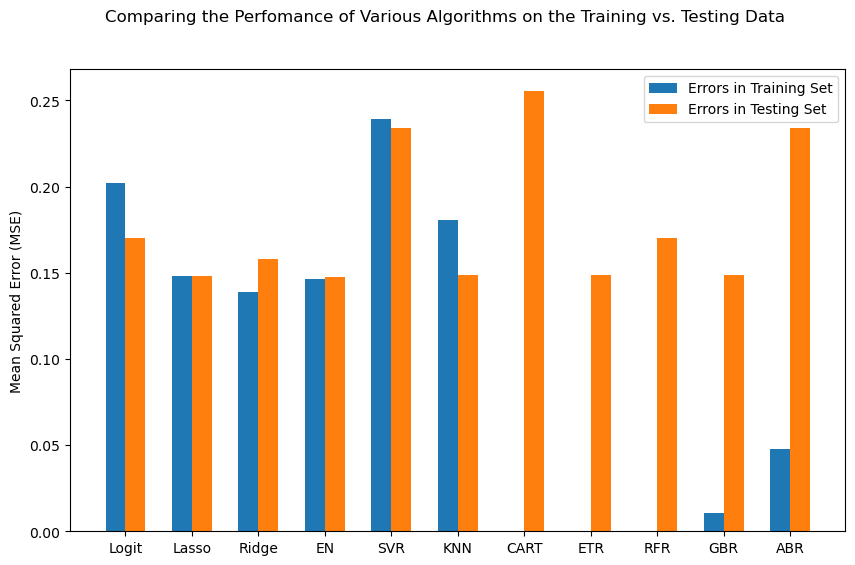

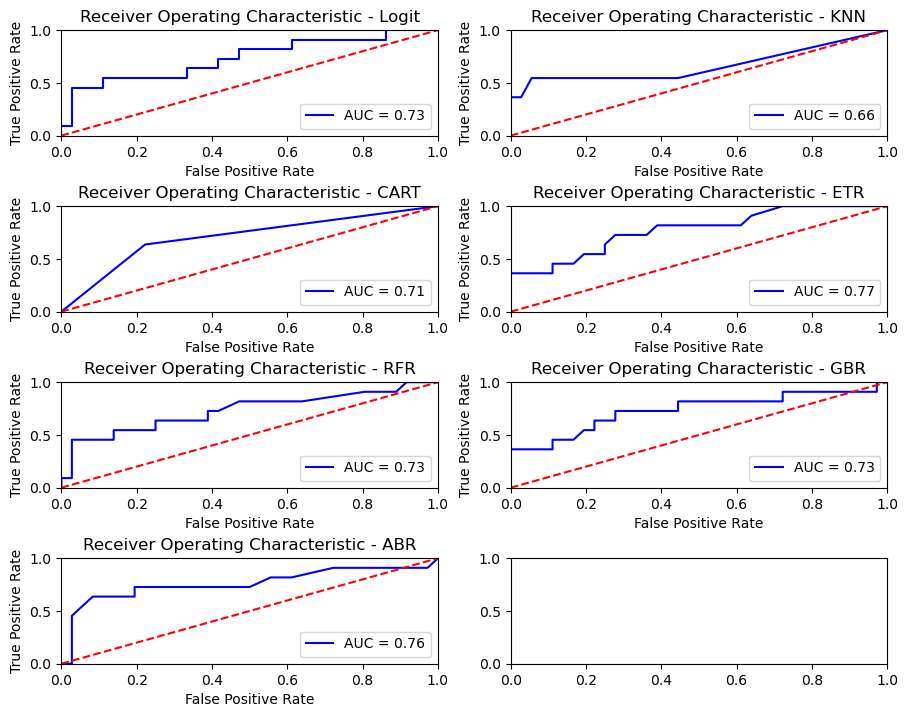

train                          test                    
            MSE      RMSE  R_square       MSE      RMSE  R_square
Logit  0.202128  0.449586 -0.110179  0.202128  0.412568  0.050505
Lasso  0.148200  0.384968  0.186017  0.148200  0.385134  0.172585
Ridge  0.138957  0.372769  0.236786  0.138957  0.397213  0.119868
EN     0.146429  0.382660  0.195744  0.146429  0.384093  0.177049
SVR    0.239362  0.489246 -0.314685  0.239362  0.483779 -0.305556
KNN    0.180851  0.425266  0.006682  0.180851  0.385922  0.169192
CART   0.000000  0.000000  1.000000  0.000000  0.505291 -0.424242
ETR    0.000000  0.000000  1.000000  0.000000  0.385922  0.169192
RFR    0.000000  0.000000  1.000000  0.000000  0.412568  0.050505
GBR    0.010638  0.103142  0.941570  0.010638  0.385922  0.169192
ABR    0.047872  0.218797  0.737063  0.047872  0.483779 -0.305556

In [14]:
validation_size = 0.2
def preprocess_data(x,y,test_size):
    x_scaled = pd.DataFrame(StandardScaler().fit_transform(x),index = x.index,columns = x.columns)
    train_size = int(len(x) * (1 - test_size))
    x_train, x_test = (x[0         :train_size], 
                       x[train_size:len(x)    ])
    y_train, y_test = (y[0         :train_size], 
                       y[train_size:len(x)    ])
    return x_train, x_test, y_train, y_test
    
X_train, X_test, y_train, y_test = preprocess_data(X,y,validation_size)


seed = 1212
models = []
models.append(("Logit",LogisticRegression(random_state = seed)))
models.append(("Lasso",Lasso(random_state = seed)))
models.append(("Ridge",Ridge(random_state = seed)))
models.append(("EN",ElasticNet(random_state = seed)))
models.append(("SVR",SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier(random_state = seed)))
models.append(("ETR",ExtraTreesClassifier(random_state = seed)))
models.append(("RFR",RandomForestClassifier(random_state = seed)))
models.append(("GBR",GradientBoostingClassifier(random_state = seed)))
models.append(("ABR",AdaBoostClassifier(random_state = seed)))

def evaluate_fitting(x_train, x_test, y_train, y_test):
    names = []
    train_MSEs = []
    train_RMSEs = []
    train_R2s = []
    test_MSEs = []
    test_R2s = []
    test_RMSEs = []
    
    names_auc = []
    FPRs = []
    TPRs = []
    ROC_AUCs = []
    
    for name,model in models:
        names.append(name)
        res = model.fit(x_train,y_train)
        
        y_pred_train = res.predict(x_train)
        train_mse = mean_squared_error(y_train,y_pred_train)
        train_MSEs.append(train_mse)
        train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))
        train_RMSEs.append(train_rmse)
        train_r2 = r2_score(y_train,y_pred_train)
        train_R2s.append(train_r2)
        
        
        y_pred_test = res.predict(x_test)
        test_mse = mean_squared_error(y_test,y_pred_test)
        test_MSEs.append(test_mse)
        test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
        test_RMSEs.append(test_rmse)
        test_r2 = r2_score(y_test,y_pred_test)
        test_R2s.append(test_r2)
        
        ## plot AUC curve
        if hasattr(model,"predict_proba"):
            names_auc.append(name)
            preds = model.predict_proba(x_test)[:,1]
            fpr,tpr,thresolds = metrics.roc_curve(y_test,preds)
            roc_auc = metrics.auc(fpr,tpr)
            FPRs.append(fpr)
            TPRs.append(tpr)
            ROC_AUCs.append(roc_auc)
        
    df_train_perform = pd.DataFrame({"MSE":train_MSEs,
                                     "RMSE":train_RMSEs,
                                     "R_square":train_R2s},index = names)
    df_test_perfrom = pd.DataFrame({"MSE":train_MSEs,
                                    "RMSE":test_RMSEs,
                                    "R_square":test_R2s},index = names)
    df_perform = pd.concat([df_train_perform,df_test_perfrom],axis = 1,keys = ["train","test"])
    vis_train_test_errors(names,train_MSEs,test_MSEs)
    vis_AUC(names_auc,FPRs,TPRs,ROC_AUCs)
    
    return df_perform

def vis_train_test_errors(names,train_results,test_results):
    fig = plt.figure(figsize = [10,6])
    ind = np.arange(len(names))
    width = 0.30
    fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")
    ax = fig.add_subplot(111)
    plt.bar(ind - width/2,train_results,width = width,label = "Errors in Training Set")
    plt.bar(ind + width/2,test_results,width = width,label = "Errors in Testing Set")
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(names)
    plt.ylabel("Mean Squared Error (MSE)")
    plt.show()
    
def vis_AUC(names,FPRs,TPRs,ROC_AUCs):
    fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(9, 7))
    index = 0
    axs = axs.flatten()
    for i in range(len(names)):   
        axs[i].plot(FPRs[i], TPRs[i], 'b', label='AUC = %0.2f' % ROC_AUCs[i])
        axs[i].legend(loc='lower right')
        axs[i].plot([0, 1], [0, 1], 'r--')
        axs[i].set_xlim([0, 1])
        axs[i].set_ylim([0, 1])
        axs[i].set_ylabel('True Positive Rate')
        axs[i].set_xlabel('False Positive Rate')
        axs[i].set_title('Receiver Operating Characteristic - {}'.format(names[i]))
    plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.5)
    plt.show()
    

df_perform = evaluate_fitting(X_train, X_test, y_train, y_test)
df_perform